In this lab you will be implementing multi-class Logisitic regression through sklearn and visualizaing the results. We are going to be using only two features from the seeds dataset. The seeds dataset contains physical information about three types of seeds. There are multiple features for each seeds and more information about the features can be found [here]('https://archive.ics.uci.edu/ml/datasets/seeds'). 

We have renamed the features as: 
1. area: area A,
2. perimeter: perimeter P,
3. compactness: compactness C = 4*pi*A/P^2,
4. kernel_length: length of kernel,
5. kernel_width: width of kernel,
6. asymmetry_coefficient: asymmetry coefficient
7. kg_length: length of kernel groove.
8. class: Type of seeds [Kama, rosa, Canadian](In the same order) 

The source of the above data dictionary is the original page on UCI Machine Learning repositry, it can be found  [here]('https://archive.ics.uci.edu/ml/datasets/seeds'). 


In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
import matplotlib 
font_specs = {'size':15}
matplotlib.rc('font', **font_specs)


In [2]:
dataset_location = "../../../data/seeds_dataset.csv"
column_names = ['area',
                'perimeter',
                'compactness',
                'kernel_length',
                'kernel_width',
                'asymmetry_coefficient',
                'kg_length',
                'class']
# Read the dataset using read dataset, you have been given the location, you will need to specify 
# the names of the headers and set the header to none
seeds_df = "####"

In [3]:
# You will need to seperate the features and the target. Remember the target is the 'class' column
X = "####"
y = "####"


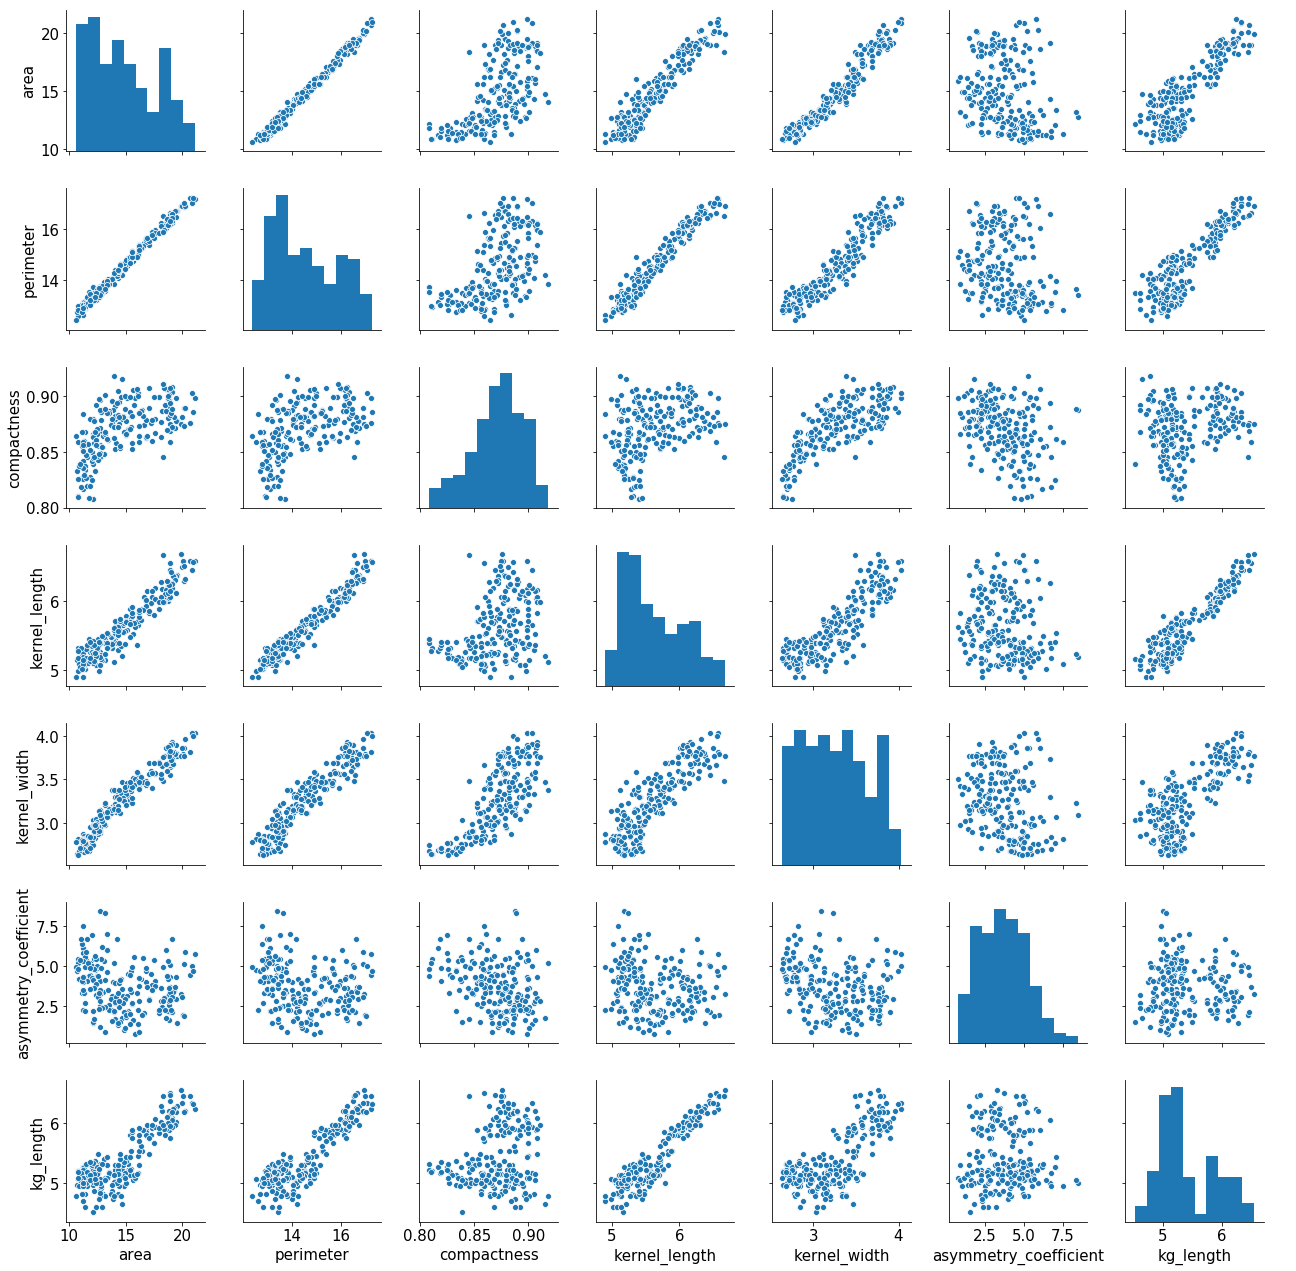

In [4]:
# Generate a pairplot to visualize the relationship between all the features.
"####"

You can immediately see that features like ```area``` and ```perimeter``` are highly correlated with many features. If we are to use all the features then we would be dropping the highly correlated ones and only keep the medium to low correlated features. However, in our case we will only two features ```compactness``` and ```kg_length``` we are doing so we can visualize the result in a 2D plot, with so many dimensions we cannot visualize the result without doing dimensionality reduction. 


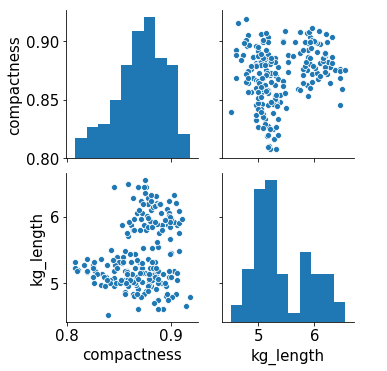

In [5]:
# Choose only two features 'compactness' and 'kg_length' to keep. There are two ways to do this
# either drop the rest of the features, or just select these two from the data frame and keep them 
X_subset = "####"

# Run a pair plot to see the data distribution looks like for them.
"####"

<img src="../../../images/mclasslgr_pairplot.png"></img>

In [6]:
# Next you need to do test train split. Set the train_size to 0.7, random_state to 0 and shuffle to true.
train_x, test_x , train_y, test_y  = "####"
train_shape = "####"
test_shape =  "####"

print("Shape of the training set is {}".format(train_shape))
print("Shape of the testing set is {}".format(test_shape))

Shape of the training set is (147, 2)
Shape of the testing set is (63, 2)


Shape of the training set is (147, 2) <br>
Shape of the testing set is (63, 2)

In [7]:
# First you need to run logistic regression, you will need to set the multilcass option to one over rest. 
# Refer to the sklearn documentation on how to do that. 
lgr_ovr ="####"

# Run fit on the training set then run predict on the test set.
preds = "####"
ovr_acc = "####"
print("Accuracy for the over vs rest method is {:.2f}%".format(ovr_acc*100))

Accuracy for the over vs rest method is 77.78%


In [8]:
# Do the same for multinomial logistic regression.
lgr_mlt = LogisticRegression(multi_class='multinomial')
"####"
preds = "####"
mlt_acc = "####"

print("Accuracy for the multiclass method is {:.2f}%".format(mlt_acc*100))

Accuracy for the multiclass method is 80.95%


In [9]:
# Use LogisticRegressionCV to do multinomial logistic regression with 5 splits, a random state
# of 0 and max_iter of 1000. You will then have to calcuate the accuracy score the same way 
# you did for the above models.
lgr_cv = LogisticRegressionCV(multi_class='multinomial', cv=5, random_state=0, max_iter=1000)
lgr_cv.fit(train_x, train_y)
cv_mlt_acc = accuracy_score(test_y, lgr_cv.predict(test_x))

print("Accuracy for multiclass method with cross validation is {:.2f}%".format(cv_mlt_acc*100))

Accuracy for multiclass method with cross validation is 92.06%


In [10]:
# Helper functions to plot 
def to_3d(x,y,plot_step=0.01): 
   

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    return xx, yy 

def plot_decision_surface(xx,yy,Z): 
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    return cs



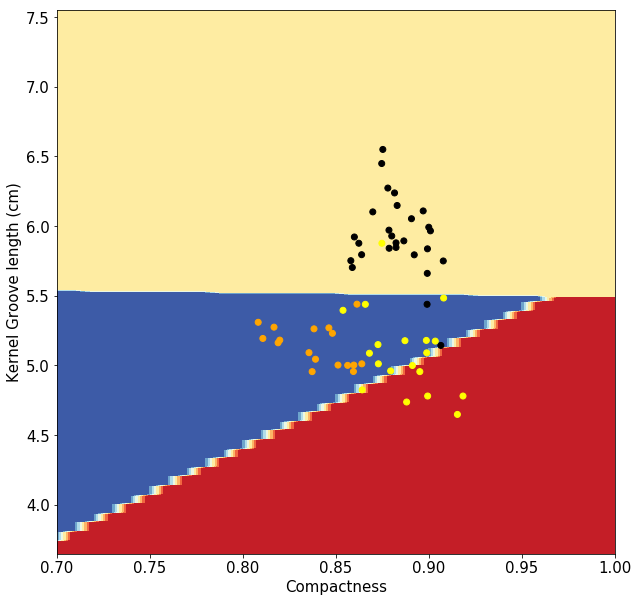

In [11]:
# We are taking the 2d dataset we have and generating a grid of points
# we will run predict on the enitre grid of points.
xx, yy = to_3d(test_x.values,test_y)

# We need to run predict on the entire grid of points. You need run 
# unravel the set of xx and yy. You can do that by using the a.ravel() function
# where a is a numpy array. Furthermore you need to concate the unraveled objects 
# by using np.c_ in the following way np.c_[xx_unraveled, yy_unraveled ].
# Use the one vs rest model to predict
Z = "####"

# You need to reshape Z to the same shape of xx or yy
Z = "####"

# Specify a color map for the original points.
colors = ['yellow','black', 'orange']
cmap= ListedColormap(colors)

# Specify a figure size.
fig= plt.figure(figsize=(10,10))

# Plot the decision surface
_ = plot_decision_surface(xx,yy, Z)

# Plot the original points
plt.scatter(test_x['compactness'].values, test_x["kg_length"].values, c=test_y,cmap=cmap )
plt.xlim([0.7, 1.0])
plt.xlabel('Compactness')
plt.ylabel('Kernel Groove length (cm)')
plt.show()    


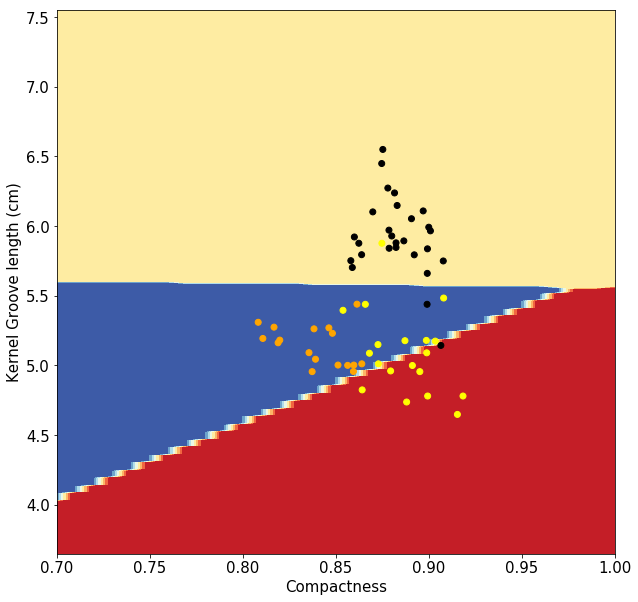

In [12]:
# We need to run predict on the entire grid of points. You need run 
# unravel the set of xx and yy. You can do that by using the a.ravel() function
# where a is a numpy array. Furthermore you need to concate the unraveled objects 
# by using np.c_ in the following way np.c_[xx_unraveled, yy_unraveled ]. 
# Use the multinomial model to predict the classes.
Z = "####"

# You need to reshape Z to the same shape of xx or yy
Z = "####"

# Specify a figure size.
fig= plt.figure(figsize=(10,10))

# Plot the decision surface
_ = plot_decision_surface(xx,yy, Z)

# Plot the original points
plt.scatter(test_x['compactness'].values, test_x["kg_length"].values, c=test_y,cmap=cmap )
plt.xlim([0.7, 1.0])
plt.xlabel('Compactness')
plt.ylabel('Kernel Groove length (cm)')
plt.show()    


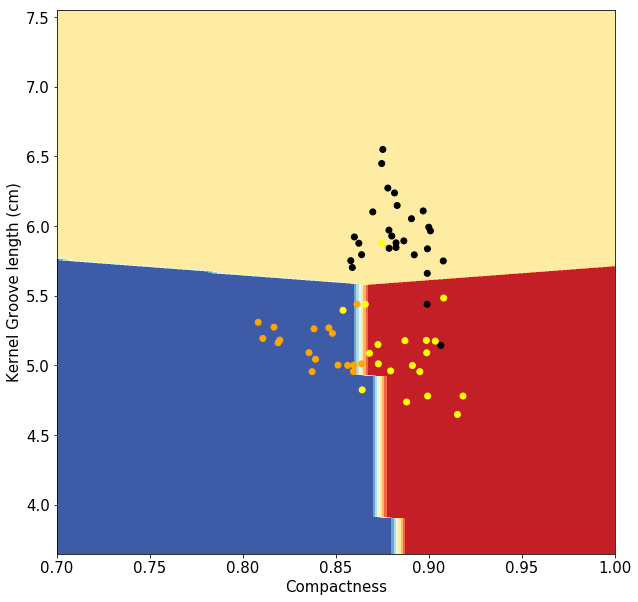

In [13]:
# We need to run predict on the entire grid of points. You need run 
# unravel the set of xx and yy. You can do that by using the a.ravel() function
# where a is a numpy array. Furthermore you need to concate the unraveled objects 
# by using np.c_ in the following way np.c_[xx_unraveled, yy_unraveled ]. 
# Use the cross validation multinomial model to predict the classes.

Z = "####"

# You need to reshape Z to the same shape of xx or yy
Z = "####"

# Specify a figure size.
fig= plt.figure(figsize=(10,10))

# Plot the decision surface
_ = plot_decision_surface(xx,yy, Z)

# Plot the original points
plt.scatter(test_x['compactness'].values, test_x["kg_length"].values, c=test_y,cmap=cmap )
plt.xlim([0.7, 1.0])
plt.xlabel('Compactness')
plt.ylabel('Kernel Groove length (cm)')
plt.show()   